<a href="https://colab.research.google.com/github/kcat28/CCADMACL_EXERCISES_COM222ML/blob/main/Exercise6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 6

Netflix is the world's largest online streaming service provider, with over 220 million subscribers. It is crucial that they effectively cluster the shows that are hosted on their platform in order to enhance the user experience, thereby preventing subscribers from ending their subscription.

We will be able to understand the shows that are similar to and different from one another by creating clusters, which may be leveraged to offer the consumers personalized show suggestions depending on their preferences.

## Instructions

1. Your task is to group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other. Use Principal Component Analysis and any Clustering Algorithm.

2. After creating the clusters, profile each cluster that you have created.

In [3005]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.preprocessing import OneHotEncoder

In [3006]:
df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXERCISES/blob/353cd84703a9e313ee7ecf37fb97a067aa81ddbc/netflix.csv?raw=true")

In [3007]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [3008]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3009]:
df.drop(columns=["show_id", "cast", "description", "title"], inplace=True)

In [3010]:
df.dropna(inplace=True)
print(len(df))

5189


In [3011]:
df.drop_duplicates(inplace=True)
print(len(df))

5184


In [3012]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5184 entries, 1 to 7786
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          5184 non-null   object
 1   director      5184 non-null   object
 2   country       5184 non-null   object
 3   date_added    5184 non-null   object
 4   release_year  5184 non-null   int64 
 5   rating        5184 non-null   object
 6   duration      5184 non-null   object
 7   listed_in     5184 non-null   object
dtypes: int64(1), object(7)
memory usage: 364.5+ KB


In [3013]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer(stop_words='english')  # Initialize vectorizer


genre_matrix = vectorizer.fit_transform(df['listed_in'])

cluster_range = range(1, 15)
inertia = []  # To store inertia values for each K

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(genre_matrix)
    inertia.append(kmeans.inertia_)


from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer # Import TfidfVectorizer

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer(stop_words='english') # Initialize vectorizer

# Vectorize the genres (or use the root genres)
genre_matrix = vectorizer.fit_transform(df['listed_in'])

# Apply k-means clustering
kmeans = KMeans(n_clusters=6, random_state=42)
df['genre_cluster'] = kmeans.fit_predict(genre_matrix)



In [3014]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

def group_countries(country):
    regions = {
        'North America': {'United States', 'Canada', 'Mexico'},
        'South America': {'Brazil', 'Argentina', 'Colombia', 'Chile', 'Peru'},
        'Europe': {'United Kingdom', 'France', 'Germany', 'Spain', 'Italy', 'Netherlands', 'Sweden', 'Denmark', 'Norway'},
        'Asia': {'India', 'Japan', 'South Korea', 'China', 'Indonesia', 'Thailand', 'Malaysia', 'Singapore', 'Philippines', 'Vietnam', 'Taiwan', 'Hong Kong'},
        'Australia/New Zealand': {'Australia', 'New Zealand'}
    }

    for region, countries in regions.items():
        if country in countries:
            return region
    return "Other"

def group_ratings(rating):
    if rating in ['TV-Y', 'TV-Y7', 'TV-G']:
        return 'Kids'
    elif rating in ['TV-PG', 'PG-13', 'TV-14']:
        return 'Teens'
    else:
        return 'Adults'

director_counts = df['director'].value_counts()
df['director_count'] = df['director'].map(director_counts).fillna(0)


# adding one-hot encoded columns to features_for_pca
df['region'] = df['country'].apply(group_countries)
df['rating_category'] = df['rating'].apply(group_ratings)
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')  # Ensure numeric
df['release_decade'] = (df['release_year'] // 10) * 10

df.drop(columns=['country', 'listed_in', 'rating', 'director'], inplace=True)

In [3015]:
le = LabelEncoder()
df['type_encoded'] = le.fit_transform(df['type'])
df['rating_encoded'] = le.fit_transform(df['rating_category'])
df['region_encoded'] = le.fit_transform(df['region'])
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')
df['date_added'] = pd.to_datetime(df['date_added'].dt.strftime('%Y-%m-%d'))
df['year_added'] = df['date_added'].dt.year

df['duration_minutes'] = df['duration'].str.extract('(\d+)').astype(int)  # Extract numerical value

df.head()

,type,date_added,release_year,duration,genre_cluster,director_count,region,rating_category,release_decade,type_encoded,rating_encoded,region_encoded,year_added,duration_minutes
1,Movie,2016-12-23,2016,93 min,1,1,North America,Adults,2010,0,0,3,2016.0,93
2,Movie,2018-12-20,2011,78 min,2,1,Asia,Adults,2010,0,0,0,2018.0,78
3,Movie,2017-11-16,2009,80 min,0,1,North America,Teens,2000,0,2,3,2017.0,80
4,Movie,2020-01-01,2008,123 min,1,4,North America,Teens,2000,0,2,3,2020.0,123
5,TV Show,2017-07-01,2016,1 Season,5,1,Other,Adults,2010,1,0,4,2017.0,1


In [3016]:
#dropping features
df.dropna(subset=['date_added'], inplace=True)
df.drop(columns=['duration'], inplace=True)
df.drop(columns=['date_added'], inplace=True)
df.drop(columns=['region', 'rating_category'], inplace=True)
df.drop(columns=['release_year'], inplace=True)
df.drop(columns=['type'], inplace=True)

df.sample(3)

,genre_cluster,director_count,release_decade,type_encoded,rating_encoded,region_encoded,year_added,duration_minutes
2510,1,5,2000,0,0,4,2020.0,117
7523,5,6,2000,0,2,0,2020.0,149
2039,4,2,2010,0,0,2,2018.0,91


In [3017]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5179 entries, 1 to 7786
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre_cluster     5179 non-null   int32  
 1   director_count    5179 non-null   int64  
 2   release_decade    5179 non-null   int64  
 3   type_encoded      5179 non-null   int64  
 4   rating_encoded    5179 non-null   int64  
 5   region_encoded    5179 non-null   int64  
 6   year_added        5179 non-null   float64
 7   duration_minutes  5179 non-null   int64  
dtypes: float64(1), int32(1), int64(6)
memory usage: 343.9 KB


In [3018]:
# Creating a copy of data
ds = df.copy()

# Exclude specified columns from scaling
columns_to_exclude = ['genre_cluster', 'director_count', 'type_encoded', 'rating_encoded', 'region_encoded']
ds_scaled = ds.drop(columns=columns_to_exclude)

# Scaling
scaler = StandardScaler()
scaler.fit(ds_scaled)
scaled_ds = pd.DataFrame(scaler.transform(ds_scaled), columns=ds_scaled.columns)

# Re-add excluded columns back into the scaled DataFrame
scaled_ds[columns_to_exclude] = ds[columns_to_exclude]

print("All features are now scaled, excluding specified columns.")


All features are now scaled, excluding specified columns.


In [3019]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,release_decade,year_added,duration_minutes,genre_cluster,director_count,type_encoded,rating_encoded,region_encoded
0,0.268506,-1.787377,-0.148787,NaN,NaN,NaN,NaN,NaN
1,0.268506,-0.346402,-0.622498,1.0,1.0,0.0,0.0,3.0
2,-0.764623,-1.066889,-0.559337,2.0,1.0,0.0,0.0,0.0
3,-0.764623,1.094573,0.798634,0.0,1.0,0.0,2.0,3.0
4,0.268506,-1.066889,-3.054213,1.0,4.0,0.0,2.0,3.0


1. Apply dimensionality reduction using Principal Component Analysis
- Use the necessary number of principal components

In [3020]:
# put your answer here
scaled_ds.dropna(inplace=True)
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2","col3"]))
PCA_ds.describe().T


,count,mean,std,min,25%,50%,75%,max
col1,3442.0,4.128662e-17,2.220414,-1.292808,-1.147161,-0.916200,0.086829,15.869775
col2,3442.0,4.128662e-18,1.948235,-3.490759,-1.630212,-0.195935,1.661008,3.621492
col3,3442.0,-4.046089e-16,1.519813,-3.588778,-1.191784,0.063678,1.187962,3.622927


In [3021]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5179 entries, 1 to 7786
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre_cluster     5179 non-null   int32  
 1   director_count    5179 non-null   int64  
 2   release_decade    5179 non-null   int64  
 3   type_encoded      5179 non-null   int64  
 4   rating_encoded    5179 non-null   int64  
 5   region_encoded    5179 non-null   int64  
 6   year_added        5179 non-null   float64
 7   duration_minutes  5179 non-null   int64  
dtypes: float64(1), int32(1), int64(6)
memory usage: 473.0 KB


In [3022]:
explained_variance = pca.explained_variance_ratio_

PC1_explainedvariance = explained_variance[0]
print("Explained variance of PC1", PC1_explainedvariance)

PC2_explainedvariance = explained_variance[1]
print("Explained variance of PC2", PC2_explainedvariance)

PC3_explainedvariance = explained_variance[2]
print("Explained variance of PC3", PC3_explainedvariance)

Explained variance of PC1 0.3323956235025918
Explained variance of PC2 0.2558998191353874
Explained variance of PC3 0.1557283495598878


In [3023]:
cumulative_variance = pca.explained_variance_ratio_.cumsum()
print("cumulative variance", cumulative_variance)

cumulative variance [0.33239562 0.58829544 0.74402379]


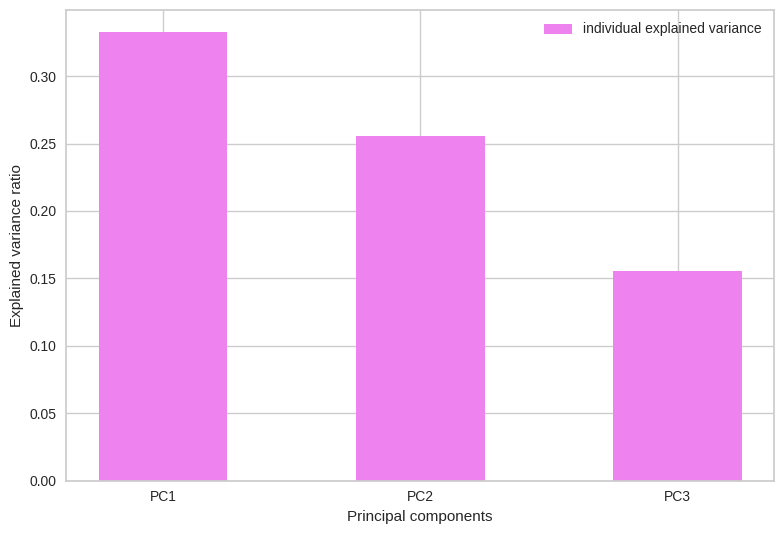

In [3024]:
plt.figure()
principalcomponents = ['PC1', 'PC2', 'PC3']

plt.bar(principalcomponents, explained_variance, width=0.5, label='individual explained variance', color='violet')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

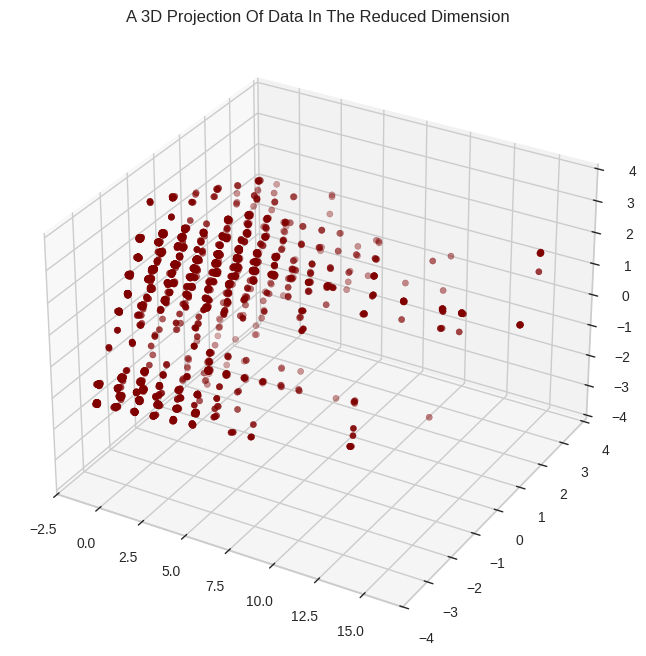

In [3025]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

2. Create a scree plot for each principal component

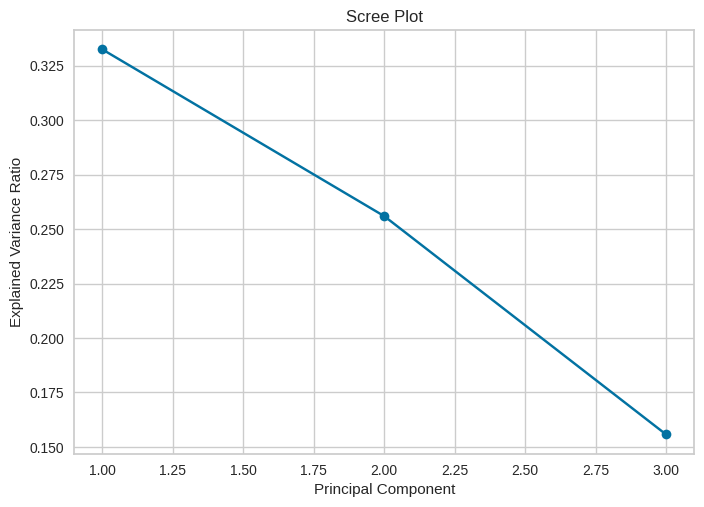

In [3026]:
# put your answer here

plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

3. Use any clustering algorithm to create clusters

In [3027]:
# put your answer here

AC = AgglomerativeClustering(n_clusters=2)

yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC

df = df.reset_index(drop=True)  # Reset index of original df
PCA_ds = PCA_ds.reset_index(drop=True)  # Reset index of PCA_ds

# Ensure both DataFrames have the same length before assignment
df = df[df.index.isin(PCA_ds.index)]  # filter df rows

df["Clusters"] = PCA_ds["Clusters"]


In [3028]:
dbs_score = davies_bouldin_score(PCA_ds[['col1', 'col2', 'col3']], yhat_AC)
chs_score = calinski_harabasz_score(PCA_ds[['col1', 'col2', 'col3']], yhat_AC)
silhouette_avg = silhouette_score(PCA_ds[['col1', 'col2', 'col3']], yhat_AC)

print("Davies-Bouldin Index AgglomerativeClustering:", dbs_score)
print("Calinski-Harabasz Index AgglomerativeClustering:", chs_score)
print("Silhouette Score for AgglomerativeClustering:", silhouette_avg)

Davies-Bouldin Index AgglomerativeClustering: 1.1876351291256164
Calinski-Harabasz Index AgglomerativeClustering: 1290.3571443463925
Silhouette Score for AgglomerativeClustering: 0.3452843762776924


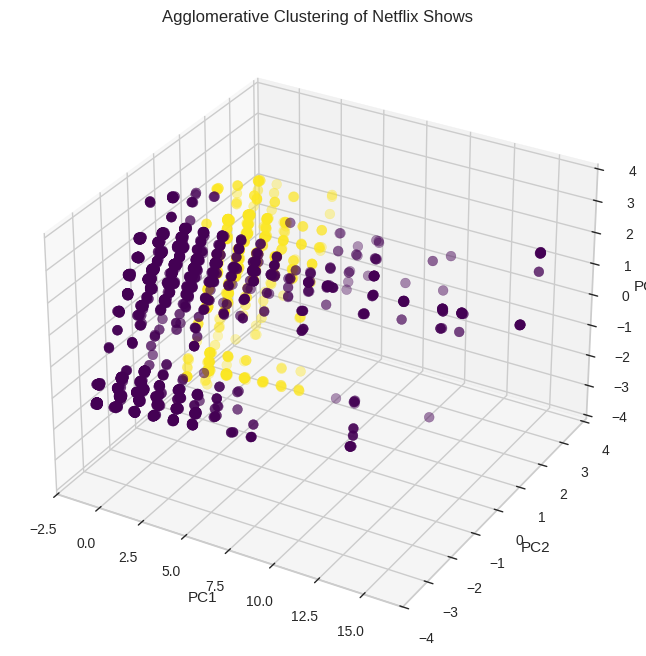

In [3029]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(PCA_ds['col1'], PCA_ds['col2'], PCA_ds['col3'],
           c=PCA_ds['Clusters'], cmap='viridis', s=50)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Agglomerative Clustering of Netflix Shows')
plt.show()

Elbow Method to determine the number of clusters to be formed:


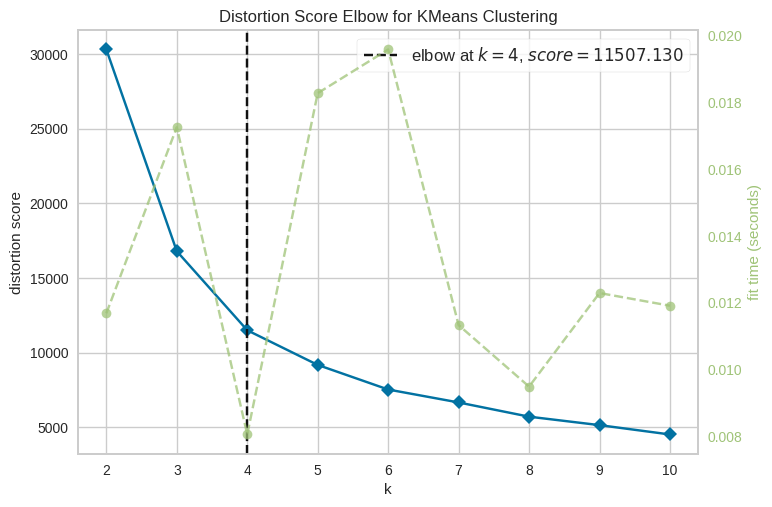

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [3030]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [3031]:
kmeans = KMeans(n_clusters=4, random_state=42)
PCA_ds["kmeans_clusters"] = kmeans.fit_predict(PCA_ds[['col1', 'col2', 'col3']])
score_kmeans = silhouette_score(PCA_ds[['col1', 'col2', 'col3']], PCA_ds["kmeans_clusters"])
dbs_score = davies_bouldin_score(PCA_ds[['col1', 'col2', 'col3']], PCA_ds["kmeans_clusters"])
chs_score = calinski_harabasz_score(PCA_ds[['col1', 'col2', 'col3']], PCA_ds["kmeans_clusters"])

print("Davies-Bouldin Index (K-Means):", dbs_score)
print("Calinski-Harabasz Index (K-Means):", chs_score)
print("Silhouette Score for K-Means:", score_kmeans)

Davies-Bouldin Index (K-Means): 0.7389075585760627
Calinski-Harabasz Index (K-Means): 2673.0635056654287
Silhouette Score for K-Means: 0.4749742269680199


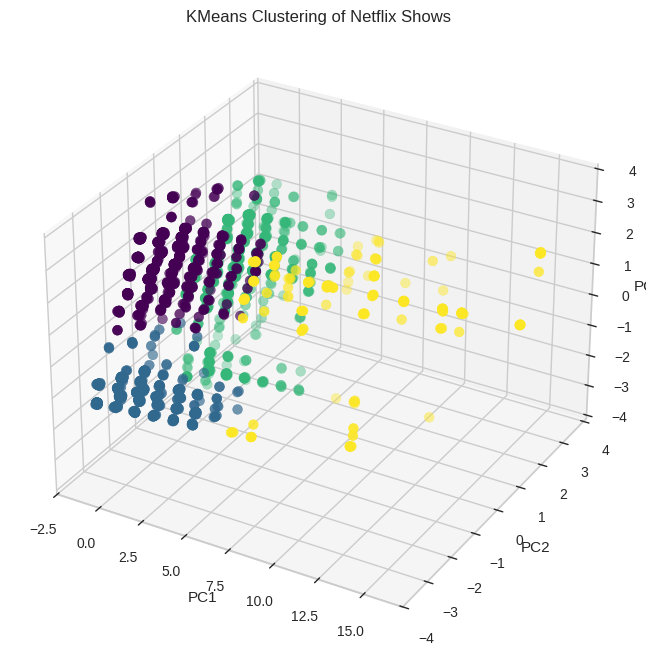

In [3032]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(PCA_ds['col1'], PCA_ds['col2'], PCA_ds['col3'],
           c=PCA_ds['kmeans_clusters'], cmap='viridis', s=50)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('KMeans Clustering of Netflix Shows')
plt.show()

In [3033]:
dbscan = DBSCAN(eps=1, min_samples=10)
dbscan_clusters = dbscan.fit_predict(PCA_ds[['col1', 'col2', 'col3']])
PCA_ds['dbscan_clusters'] = dbscan_clusters

In [3034]:
dbs_score = davies_bouldin_score(PCA_ds[['col1', 'col2', 'col3']], dbscan_clusters)
chs_score = calinski_harabasz_score(PCA_ds[['col1', 'col2', 'col3']], dbscan_clusters)
silhouette_avg_dbscan = silhouette_score(PCA_ds[['col1', 'col2', 'col3']], dbscan_clusters)

print("Davies-Bouldin Index (DBSCAN):", dbs_score)
print("Calinski-Harabasz Index (DBSCAN):", chs_score)
print("Silhouette Score (DBSCAN):", silhouette_avg_dbscan)

Davies-Bouldin Index (DBSCAN): 1.5353011822443148
Calinski-Harabasz Index (DBSCAN): 390.6680678363801
Silhouette Score (DBSCAN): 0.625427558064219


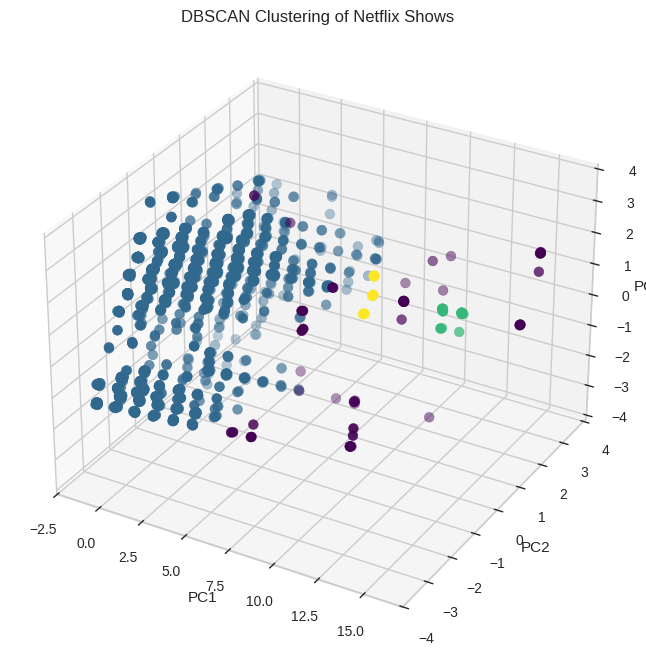

In [3035]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color-coded clusters
ax.scatter(PCA_ds['col1'], PCA_ds['col2'], PCA_ds['col3'],
           c=PCA_ds['dbscan_clusters'], cmap='viridis', s=50)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('DBSCAN Clustering of Netflix Shows')

plt.show()

In [3036]:
df['dbscan_clusters'] = PCA_ds['dbscan_clusters'] # Assign the cluster labels from PCA_ds to df

4. Profile each cluster that you have generated based on your experiments

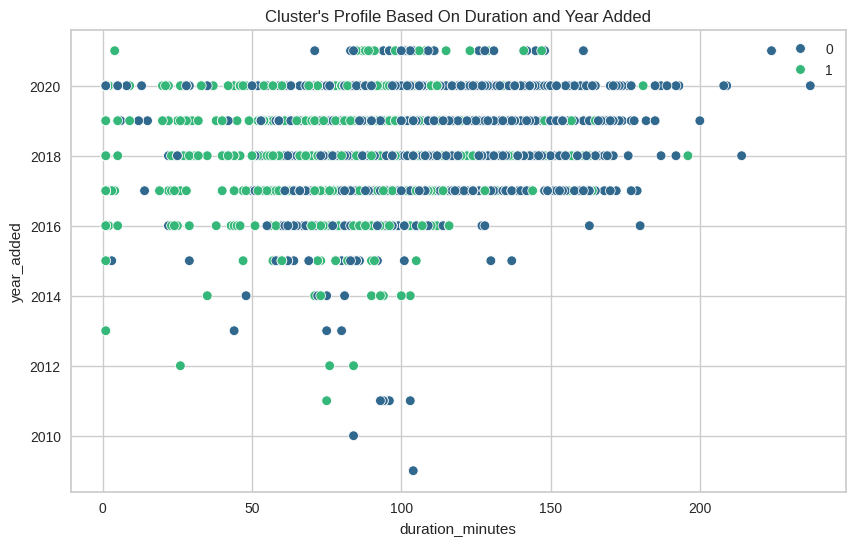

In [3037]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='duration_minutes', y='year_added', hue='Clusters', palette='viridis')
plt.title("Cluster's Profile Based On Duration and Year Added")
plt.legend()
plt.show()

<ipython-input-3038-eb5b24cc8f13>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x='kmeans_clusters', data=df, palette=pal)


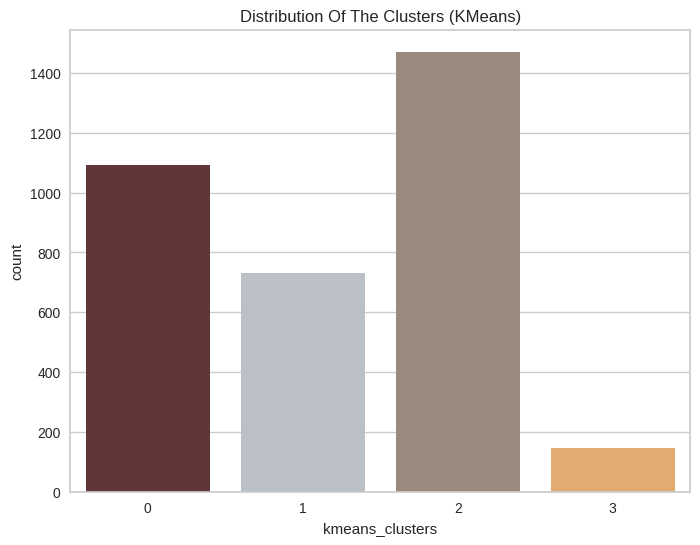

In [3038]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define your color palette
pal = ["#682F2F", "#B9C0C9", "#9F8A78", "#F3AB60"]


df['kmeans_clusters'] = PCA_ds['kmeans_clusters']  # Add the 'kmeans_clusters' column to 'df'

# Create the countplot using 'kmeans_clusters'
plt.figure(figsize=(8, 6))
pl = sns.countplot(x='kmeans_clusters', data=df, palette=pal)
pl.set_title("Distribution Of The Clusters (KMeans)")

plt.show()

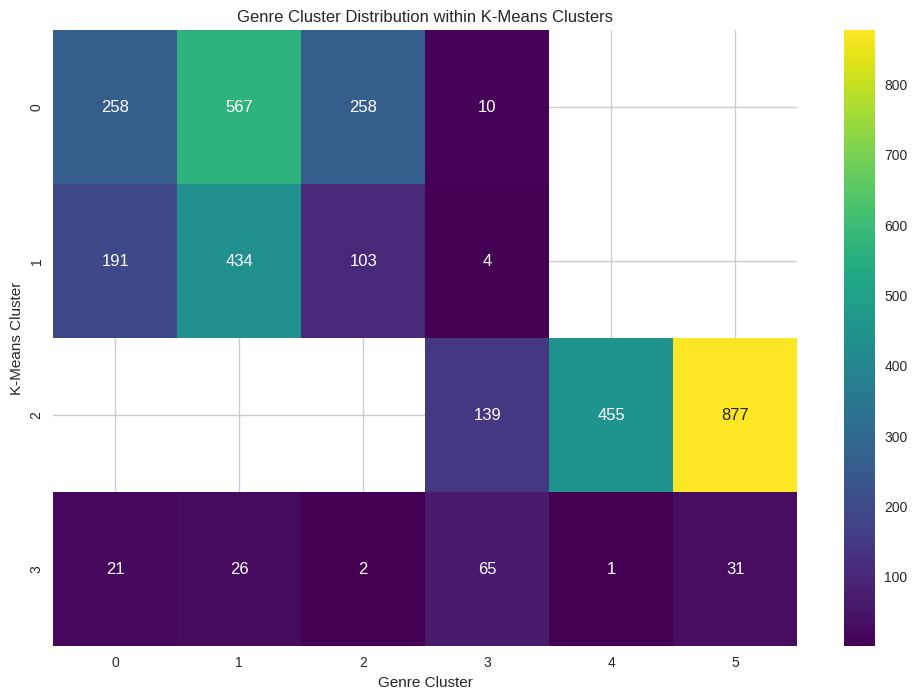

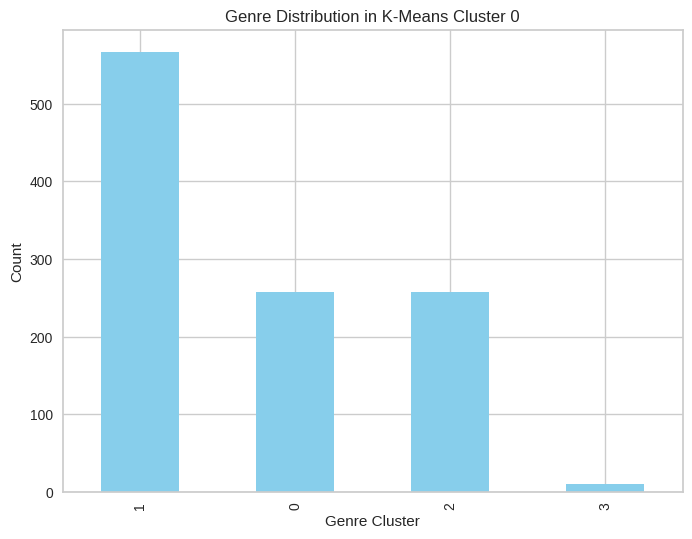

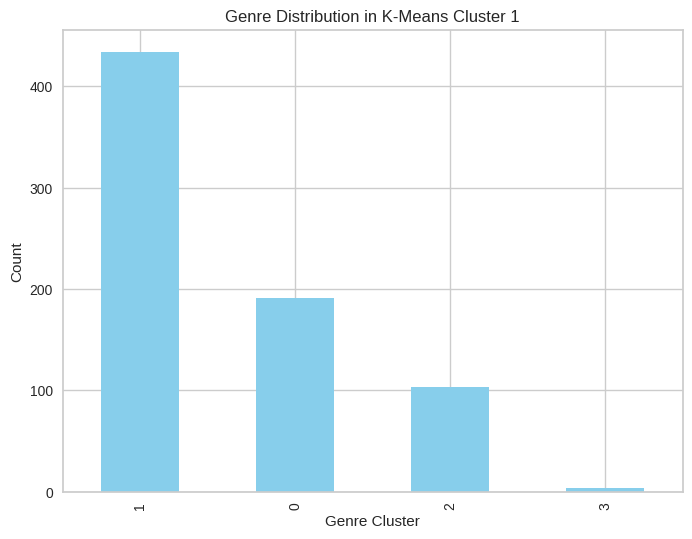

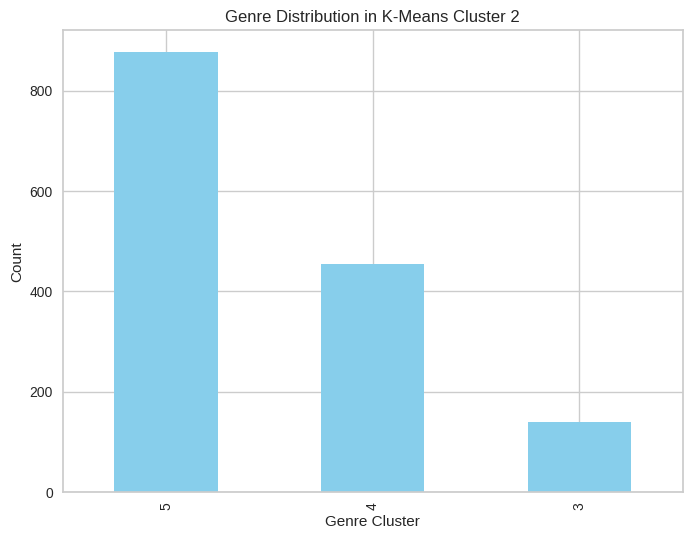

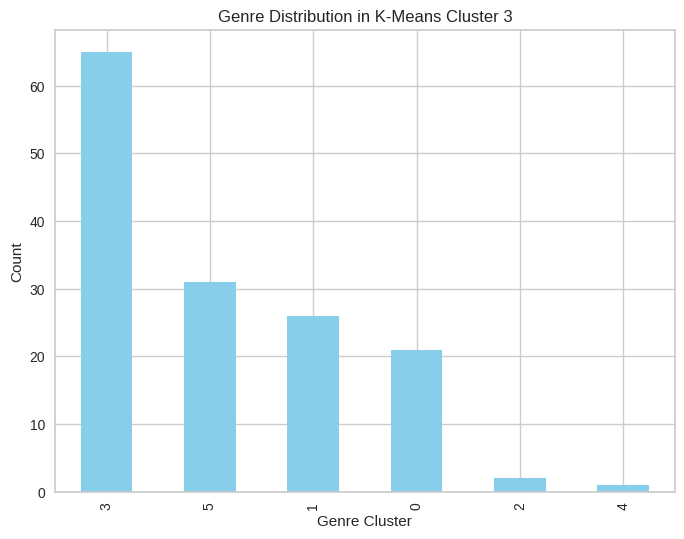

In [3039]:
# Group by K-Means clusters and genre clusters, then count shows:
cluster_genre_counts = df.groupby(['kmeans_clusters', 'genre_cluster'])['type_encoded'].count().reset_index()

# Visualize using a heatmap:
plt.figure(figsize=(12, 8))
heatmap_data = cluster_genre_counts.pivot(index='kmeans_clusters', columns='genre_cluster', values='type_encoded')
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='g')
plt.title('Genre Cluster Distribution within K-Means Clusters')
plt.xlabel('Genre Cluster')
plt.ylabel('K-Means Cluster')
plt.show()

# (Optional) Visualize with bar plots for individual K-Means clusters:
for cluster in df['kmeans_clusters'].unique():
    plt.figure(figsize=(8, 6))
    cluster_data = df[df['kmeans_clusters'] == cluster]['genre_cluster'].value_counts()
    cluster_data.plot(kind='bar', color='skyblue')
    plt.title(f'Genre Distribution in K-Means Cluster {cluster}')
    plt.xlabel('Genre Cluster')
    plt.ylabel('Count')
    plt.show()

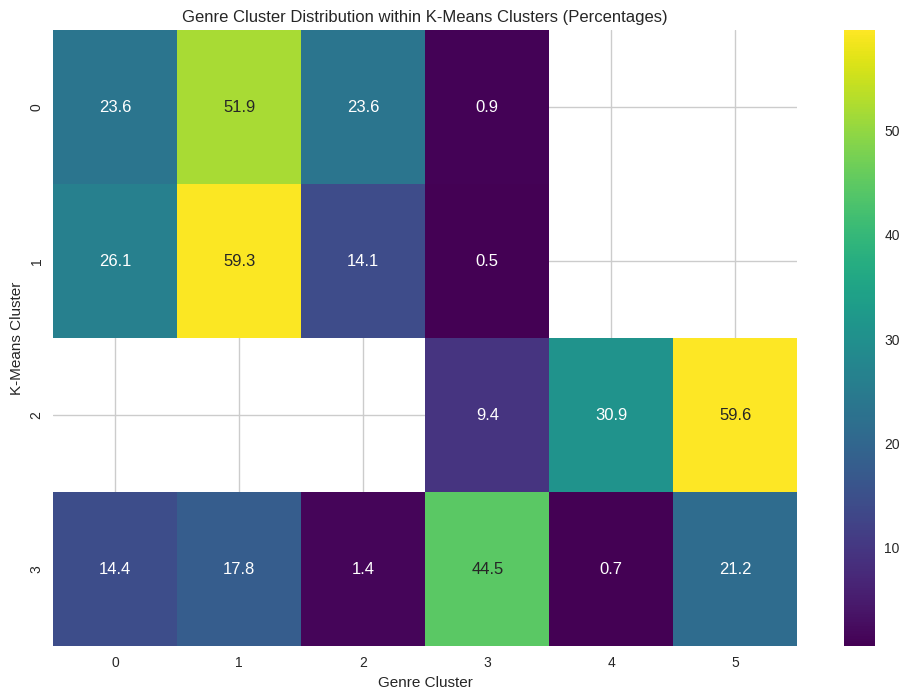


--- Profile for K-Means Cluster 0 ---
Size: 1093 shows/movies
Dominant Genres (Top 3):
- Drama: 51.9%
- Action & Adventure, Independent Movies, Sci-Fi: 23.6%
- Horror Movies, International Movies, Thrillers: 23.6%

Movie/TV Show Ratio:
- 0: 99.6%
- 1: 0.4%
----------------------------------------

Region Distribution:
region_encoded
3    44.007319
4    42.909424
2     9.515096
5     3.568161
Name: proportion, dtype: float64


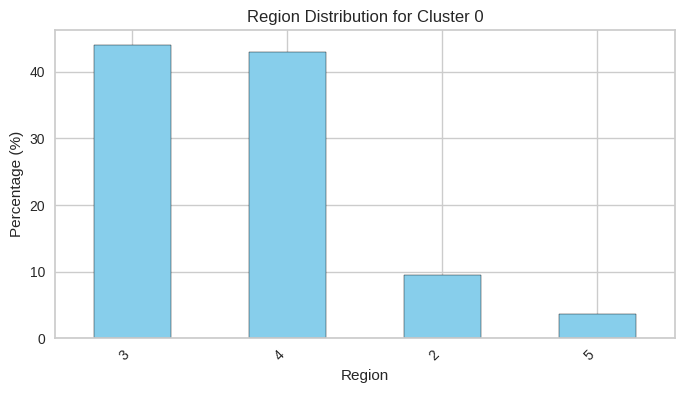


Release Decade Distribution:
release_decade
2010    75.388838
2000    10.887466
2020     5.946935
1990     3.842635
1980     1.738335
1970     1.189387
1960     0.731930
1950     0.274474
Name: proportion, dtype: float64


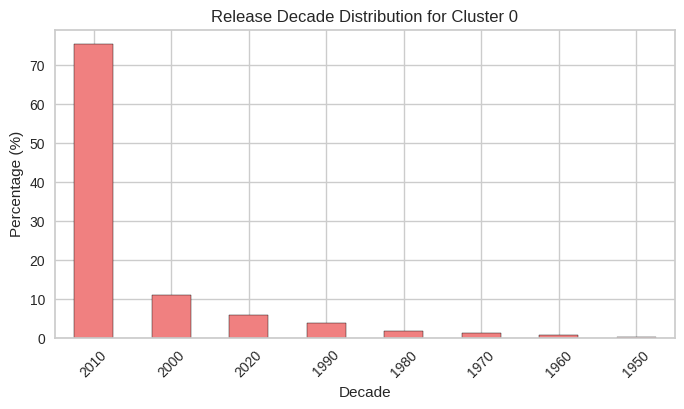


--- Profile for K-Means Cluster 1 ---
Size: 732 shows/movies
Dominant Genres (Top 3):
- Drama: 59.3%
- Action & Adventure, Independent Movies, Sci-Fi: 26.1%
- Horror Movies, International Movies, Thrillers: 14.1%

Movie/TV Show Ratio:
- 0: 100.0%
----------------------------------------

Region Distribution:
region_encoded
0    97.131148
1     2.049180
2     0.819672
Name: proportion, dtype: float64


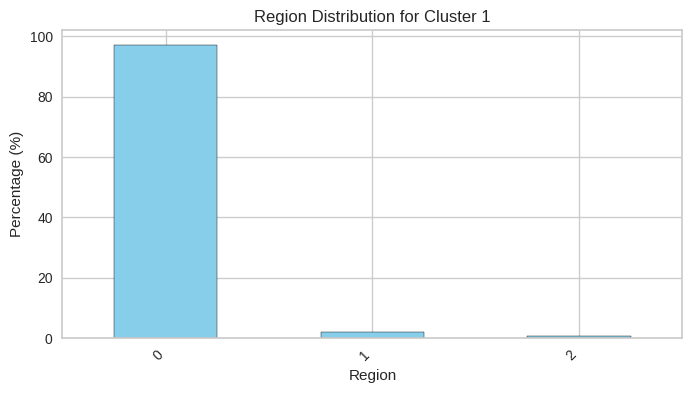


Release Decade Distribution:
release_decade
2010    67.759563
2000    15.983607
2020     6.284153
1990     4.371585
1980     3.688525
1970     1.502732
1960     0.409836
Name: proportion, dtype: float64


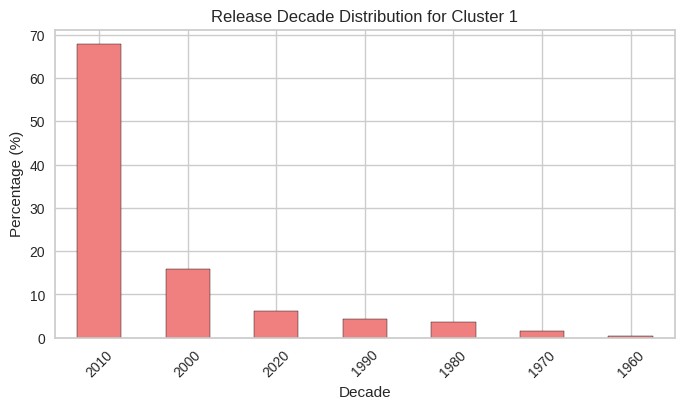


--- Profile for K-Means Cluster 2 ---
Size: 1471 shows/movies
Dominant Genres (Top 3):
- International TV Shows, TV Dramas, TV Mysteries, Comedies: 59.6%
- Dramas, International Movies, Romantic Movies: 30.9%
- Documentaries, International Movies, Sports Movies: 9.4%

Movie/TV Show Ratio:
- 0: 93.3%
- 1: 6.7%
----------------------------------------

Region Distribution:
region_encoded
3    50.373895
4    21.006118
0    12.644460
2    11.828688
5     2.923182
1     1.223657
Name: proportion, dtype: float64


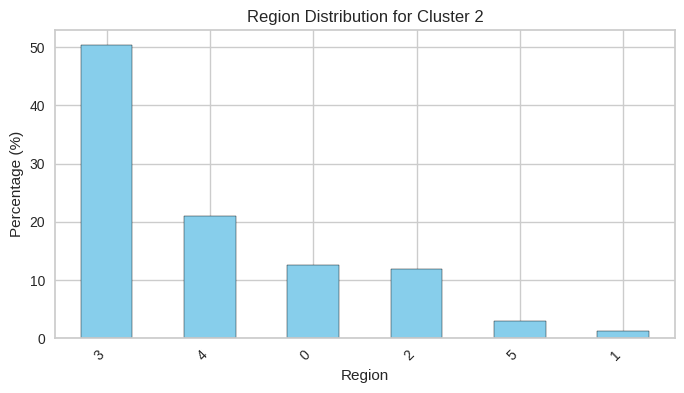


Release Decade Distribution:
release_decade
2010    75.934738
2000     9.721278
2020     9.585316
1990     2.311353
1980     1.155676
1970     0.815772
1940     0.339905
1960     0.067981
1950     0.067981
Name: proportion, dtype: float64


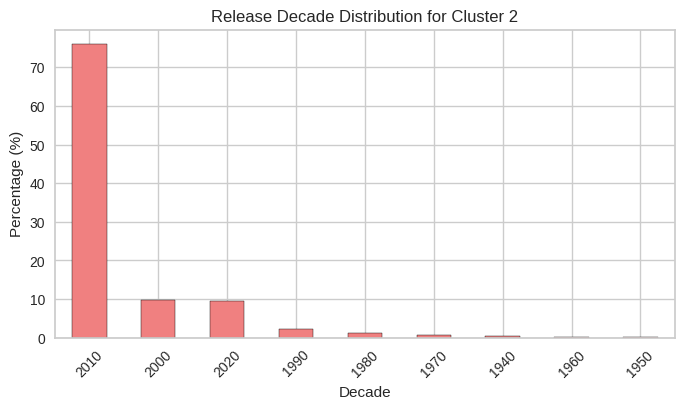


--- Profile for K-Means Cluster 3 ---
Size: 146 shows/movies
Dominant Genres (Top 3):
- Documentaries, International Movies, Sports Movies: 44.5%
- International TV Shows, TV Dramas, TV Mysteries, Comedies: 21.2%
- Drama: 17.8%

Movie/TV Show Ratio:
- 0: 98.6%
- 1: 1.4%
----------------------------------------

Region Distribution:
region_encoded
3    55.479452
4    26.712329
0    13.698630
5     4.109589
Name: proportion, dtype: float64


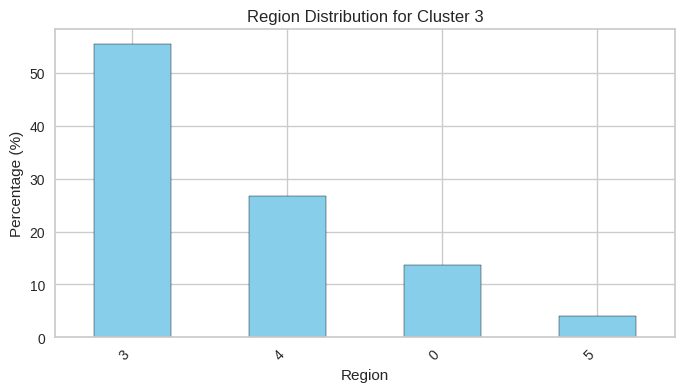


Release Decade Distribution:
release_decade
2010    69.178082
2000    12.328767
1990     6.849315
1980     4.109589
2020     3.424658
1970     2.739726
1950     1.369863
Name: proportion, dtype: float64


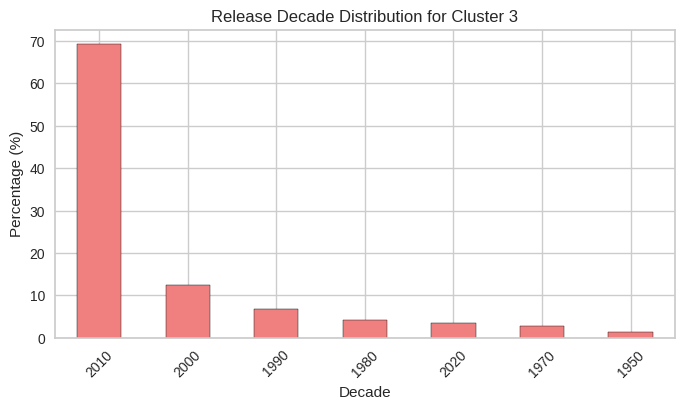

In [3040]:
# 1. Calculate Cluster Sizes:
cluster_sizes = df['kmeans_clusters'].value_counts().sort_index()

# 2. Calculate Genre Distribution within Each K-Means Cluster (Percentages):
cluster_genre_counts = df.groupby(['kmeans_clusters', 'genre_cluster'])['type_encoded'].count().reset_index()
heatmap_data = cluster_genre_counts.pivot(index='kmeans_clusters', columns='genre_cluster', values='type_encoded')

# Convert counts to percentages within each K-Means cluster:
genre_percentages = heatmap_data.apply(lambda x: (x / cluster_sizes[x.name]) * 100, axis=1)

# 3. Create Heatmap with Percentages:
plt.figure(figsize=(12, 8))
sns.heatmap(genre_percentages, annot=True, cmap='viridis', fmt=".1f")  # Format to 1 decimal place
plt.title('Genre Cluster Distribution within K-Means Clusters (Percentages)')
plt.xlabel('Genre Cluster')
plt.ylabel('K-Means Cluster')
plt.show()

# 4. Detailed Cluster Profiles (Textual Description and Analysis):
genre_cluster_names = {
    0: "Action & Adventure, Independent Movies, Sci-Fi",
    1: "Drama",
    2: "Horror Movies, International Movies, Thrillers",
    3: "Documentaries, International Movies, Sports Movies",
    4: "Dramas, International Movies, Romantic Movies",
    5: "International TV Shows, TV Dramas, TV Mysteries, Comedies"
}

# Regions dictionary (grouping countries into broader regions)
regions = {
    'North America': {'United States', 'Canada', 'Mexico'},
    'South America': {'Brazil', 'Argentina', 'Colombia', 'Chile', 'Peru'},
    'Europe': {'United Kingdom', 'France', 'Germany', 'Spain', 'Italy', 'Netherlands', 'Sweden', 'Denmark', 'Norway'},
    'Asia': {'India', 'Japan', 'South Korea', 'China', 'Indonesia', 'Thailand', 'Malaysia', 'Singapore', 'Philippines', 'Vietnam', 'Taiwan', 'Hong Kong'},
    'Australia/New Zealand': {'Australia', 'New Zealand'},
    'Other': set()  # Catch-all for unlisted countries
}

# Function to get region from country
def get_region(country):
    for region, countries in regions.items():
        if country in countries:
            return region
    return "Other"

# **Step: Assign Region Encoding to df Before Loop**
if 'country' in df.columns:
    df['region_encoded'] = df['country'].apply(get_region)

# **Iterate Over Each Cluster for Analysis**
for cluster in df['kmeans_clusters'].unique():
    print(f"\n--- Profile for K-Means Cluster {cluster} ---")
    cluster_data = df[df['kmeans_clusters'] == cluster].copy()

    # Cluster Size:
    cluster_size = len(cluster_data)
    print(f"Size: {cluster_size} shows/movies")

    # Dominant Genres (Top 3 by Percentage):
    genre_counts = cluster_data['genre_cluster'].value_counts(normalize=True) * 100
    top_3_genres = genre_counts.head(3)

    print("Dominant Genres (Top 3):")
    for genre_id, percentage in top_3_genres.items():
        print(f"- {genre_cluster_names.get(genre_id, f'Genre Cluster {genre_id}')}: {percentage:.1f}%")

    # Movie/TV Show Ratio:
    type_counts = cluster_data['type_encoded'].value_counts(normalize=True) * 100
    print("\nMovie/TV Show Ratio:")
    for type_name, percentage in type_counts.items():
        print(f"- {type_name}: {percentage:.1f}%")

    print("-" * 40)  # Separator

    # Region Distribution:
    if 'region_encoded' in cluster_data.columns:
        region_counts = cluster_data['region_encoded'].value_counts(normalize=True) * 100
        print("\nRegion Distribution:")
        print(region_counts)

        # **Plot Region Distribution Bar Chart**
        plt.figure(figsize=(8, 4))
        ax = region_counts.plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(f"Region Distribution for Cluster {cluster}")
        plt.xlabel("Region")
        plt.ylabel("Percentage (%)")

        # Ensure readable labels
        ax.set_xticklabels(region_counts.index, rotation=45, ha="right")

        plt.show()

    # Release Decade Distribution:
    if 'release_decade' in cluster_data.columns:
        decade_counts = cluster_data['release_decade'].value_counts(normalize=True) * 100
        print("\nRelease Decade Distribution:")
        print(decade_counts)

        # **Plot Release Decade Bar Chart**
        plt.figure(figsize=(8, 4))
        decade_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
        plt.title(f"Release Decade Distribution for Cluster {cluster}")
        plt.xlabel("Decade")
        plt.ylabel("Percentage (%)")
        plt.xticks(rotation=45)
        plt.show()


In [3041]:
cluster_stats = df.groupby('kmeans_clusters')[['duration_minutes', 'year_added', 'director_count', 'type_encoded', 'rating_encoded', 'region_encoded', 'release_decade']].describe()
print(cluster_stats)

                duration_minutes                                              \
                           count        mean        std   min     25%    50%   
kmeans_clusters                                                                
0                         1093.0  101.378774  21.907840   3.0   90.00   99.0   
1                          732.0  121.826503  26.130813  15.0  103.00  120.0   
2                         1471.0   82.787220  32.248550   1.0   70.00   90.0   
3                          146.0   93.965753  34.163989   1.0   64.25   91.5   

                              year_added               ... region_encoded  \
                   75%    max      count         mean  ...            75%   
kmeans_clusters                                        ...                  
0                111.0  237.0     1093.0  2018.601098  ...            4.0   
1                137.0  224.0      732.0  2018.521858  ...            0.0   
2                101.0  196.0     1471.0  2018.327668 